In [1]:
# Import pandas 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


# Read in red wine data 
wines = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

In [2]:
y = wines.quality
X = wines.drop(['quality'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=46, stratify=y)

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train_scaled = scaler.transform(X_train)

# Scale the test set
X_test_scaled = scaler.transform(X_test)

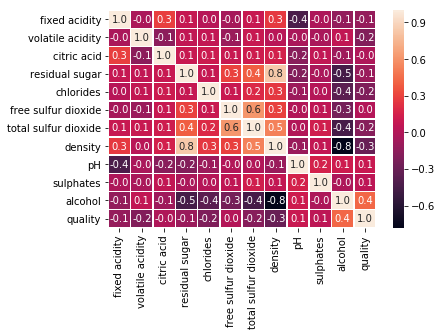

In [3]:
import seaborn as sns
corr_matrx = wines.corr()
sns.heatmap(corr_matrx, annot=True, linewidths=.5, fmt= '.1f')

In [4]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train_scaled, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
y_pred = regressor.predict(X_test_scaled)

In [6]:
from sklearn import metrics  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 0.5355970055458338


In [7]:
#k-Fold cross validation for improving our model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train,
                             y = y_train, cv = 10)
#we can see model's average accuracy
accuracies.mean()

0.27037587262138085

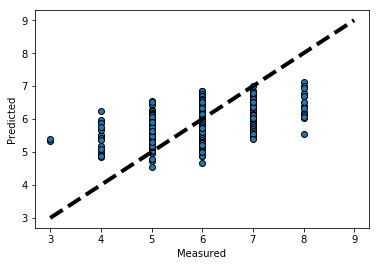

In [8]:
#pyplt.scatter(y_pred, y_test,  color='black')
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Automatically created module for IPython interactive environment


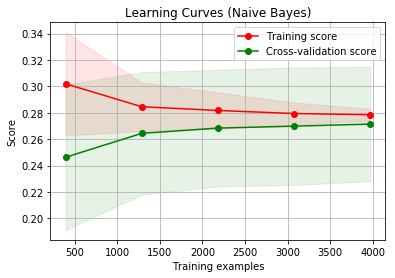

In [9]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=10,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 10% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)


plot_learning_curve(regressor, title, X_train_scaled, y_train, cv=cv, n_jobs=1)

plt.show()

<class 'sklearn.linear_model.coordinate_descent.Lasso'> Alpha: 1e-05 CV Score: 0.27038682215212706
<class 'sklearn.linear_model.coordinate_descent.Lasso'> Alpha: 1.3738237958832637e-05 CV Score: 0.2703909035916894
<class 'sklearn.linear_model.coordinate_descent.Lasso'> Alpha: 1.8873918221350958e-05 CV Score: 0.27039641084105337
<class 'sklearn.linear_model.coordinate_descent.Lasso'> Alpha: 2.592943797404667e-05 CV Score: 0.2704038805551854
<class 'sklearn.linear_model.coordinate_descent.Lasso'> Alpha: 3.5622478902624444e-05 CV Score: 0.27041402514599533
<class 'sklearn.linear_model.coordinate_descent.Lasso'> Alpha: 4.893900918477499e-05 CV Score: 0.27042762153930955
<class 'sklearn.linear_model.coordinate_descent.Lasso'> Alpha: 6.723357536499335e-05 CV Score: 0.2704463471507834
<class 'sklearn.linear_model.coordinate_descent.Lasso'> Alpha: 9.236708571873866e-05 CV Score: 0.2704719405596636
<class 'sklearn.linear_model.coordinate_descent.Lasso'> Alpha: 0.0001268961003167922 CV Score: 0.

<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> Alpha: 1e-05 CV Score: 0.27038418157343524
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> Alpha: 1.3738237958832637e-05 CV Score: 0.27038728022221264
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> Alpha: 1.8873918221350958e-05 CV Score: 0.27039153553162704
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> Alpha: 2.592943797404667e-05 CV Score: 0.27039736327914377
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> Alpha: 3.5622478902624444e-05 CV Score: 0.2704051794996383
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> Alpha: 4.893900918477499e-05 CV Score: 0.27041589067499483
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> Alpha: 6.723357536499335e-05 CV Score: 0.27043032471690037
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> Alpha: 9.236708571873866e-05 CV Score: 0.27045002660837875
<class 'sklearn.linear_model.coordinate_descent.Elasti

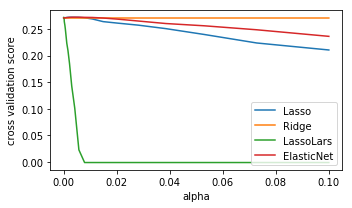

In [10]:
from sklearn.linear_model import Ridge, Lasso, LassoLars, ElasticNet

alphas = np.logspace(-5, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge, LassoLars, ElasticNet]:
    scores = [cross_val_score(Model(alpha), X_train_scaled, y_train, cv=10).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)
    for i in range (len(alphas)):
        print(str(Model), "Alpha: " + str(alphas[i]),"CV Score: " + str(scores[i]))

plt.legend(loc='lower right')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [11]:
ridger = Ridge(alpha=0.1, solver = 'sag')
ridger.fit(X_train_scaled, y_train) 
y_pred = ridger.predict(X_test_scaled) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 0.5355966768403944


In [12]:
from sklearn import linear_model
lassy = linear_model.Lasso(alpha=0.001)
lassy.fit(X_train_scaled, y_train)
y_pred = lassy.predict(X_test_scaled)  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))   

Mean Squared Error: 0.5361686252229354


In [13]:
laslars = LassoLars(alpha=0.0001)
laslars.fit(X_train_scaled, y_train)
y_pred = laslars.predict(X_test_scaled)  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 0.5406428296113058


In [14]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(alphas=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], cv=10, random_state=0)
regr.fit(X_train_scaled, y_train)
print(regr.alpha_) 
print(regr.intercept_) 
print(regr.predict) 

0.1
5.877949183303086
<bound method LinearModel.predict of ElasticNetCV(alphas=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], copy_X=True, cv=10,
       eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
       n_alphas=100, n_jobs=1, normalize=False, positive=False,
       precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
       verbose=0)>


In [15]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha = 0.001, random_state=0)
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 0.5358886654038828
